# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 4</font>
## <font color='blue'>Análise de Dados Para Campanhas de Marketing de Instituições Financeiras</font>

**Não tenha pressa de chegar ao final. O aprendizado não está no final. O aprendizado está na jornada. Aproveite a jornada!**

![title](imagens/Projeto4.png)

## Pré-Requisitos

Recomendamos que você tenha concluído pelo menos os 5 primeiros capítulos do curso gratuito de <a href="https://www.datascienceacademy.com.br/course?courseid=python-fundamentos">Python Fundamentos Para Análise de Dados</a>.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.13.5


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 2.2.3
numpy     : 2.1.3
matplotlib: 3.10.0
seaborn   : 0.13.2
json      : 2.0.9
platform  : 1.0.8



## Carregando os Dados

In [5]:
# Carrega o dataset
df = pd.read_csv("dados/dataset.csv") 

In [6]:
# Shape
df.shape

(45211, 19)

In [7]:
# Amostra
df.head()

customerid   age    salary  balance  marital                  jobedu  \
0           1  58.0  100000.0     2143  married     management,tertiary   
1           2  44.0   60000.0       29   single    technician,secondary   
2           3  33.0  120000.0        2  married  entrepreneur,secondary   
3           4  47.0   20000.0     1506  married     blue-collar,unknown   
4           5  33.0       0.0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1         0  unknown       no  
2     -1         0  unknown       no  
3     -1         0  unknown       no  
4     -1         0  unknown       no

## Análise Exploratória

In [8]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [9]:
# Temos valores nulos?
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [10]:
# Temos valores nulos?
df.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [11]:
# Não usaremos a coluna ID. Vamos removê-la.
df.drop(["customerid"], axis = 1, inplace = True)

In [12]:
# Colunas
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

> Exercício 1: A coluna "jobedu" parece ter duas informações. Vamos separar em duas colunas.

In [13]:
df.head()

age    salary  balance  marital                  jobedu targeted default  \
0  58.0  100000.0     2143  married     management,tertiary      yes      no   
1  44.0   60000.0       29   single    technician,secondary      yes      no   
2  33.0  120000.0        2  married  entrepreneur,secondary      yes      no   
3  47.0   20000.0     1506  married     blue-collar,unknown       no      no   
4  33.0       0.0        1   single         unknown,unknown       no      no   

  housing loan  contact  day      month duration  campaign  pdays  previous  \
0     yes   no  unknown    5  may, 2017  261 sec         1     -1         0   
1     yes   no  unknown    5  may, 2017  151 sec         1     -1         0   
2     yes  yes  unknown    5  may, 2017   76 sec         1     -1         0   
3     yes   no  unknown    5  may, 2017   92 sec         1     -1         0   
4      no   no  unknown    5  may, 2017  198 sec         1     -1         0   

  poutcome response  
0  unknown       no  
1  unknown       no  
2  unknown       no  
3  unknown       no  
4  unknown       no

In [14]:
# Fazemos o split da coluna jobedu e criamos a coluna job com o primeiro elemento antes da vírgula
df['job'] = df["jobedu"].apply(lambda x:x.split(",")[0])

In [15]:
df.head()

age    salary  balance  marital                  jobedu targeted default  \
0  58.0  100000.0     2143  married     management,tertiary      yes      no   
1  44.0   60000.0       29   single    technician,secondary      yes      no   
2  33.0  120000.0        2  married  entrepreneur,secondary      yes      no   
3  47.0   20000.0     1506  married     blue-collar,unknown       no      no   
4  33.0       0.0        1   single         unknown,unknown       no      no   

  housing loan  contact  day      month duration  campaign  pdays  previous  \
0     yes   no  unknown    5  may, 2017  261 sec         1     -1         0   
1     yes   no  unknown    5  may, 2017  151 sec         1     -1         0   
2     yes  yes  unknown    5  may, 2017   76 sec         1     -1         0   
3     yes   no  unknown    5  may, 2017   92 sec         1     -1         0   
4      no   no  unknown    5  may, 2017  198 sec         1     -1         0   

  poutcome response           job  
0  unknown       no    management  
1  unknown       no    technician  
2  unknown       no  entrepreneur  
3  unknown       no   blue-collar  
4  unknown       no       unknown

In [16]:
# Fazemos o split da coluna jobedu e criamos a coluna education com o segundo elemento antes da vírgula
df['education'] = df["jobedu"].apply(lambda x:x.split(",")[1])

In [17]:
df.head()

age    salary  balance  marital                  jobedu targeted default  \
0  58.0  100000.0     2143  married     management,tertiary      yes      no   
1  44.0   60000.0       29   single    technician,secondary      yes      no   
2  33.0  120000.0        2  married  entrepreneur,secondary      yes      no   
3  47.0   20000.0     1506  married     blue-collar,unknown       no      no   
4  33.0       0.0        1   single         unknown,unknown       no      no   

  housing loan  contact  day      month duration  campaign  pdays  previous  \
0     yes   no  unknown    5  may, 2017  261 sec         1     -1         0   
1     yes   no  unknown    5  may, 2017  151 sec         1     -1         0   
2     yes  yes  unknown    5  may, 2017   76 sec         1     -1         0   
3     yes   no  unknown    5  may, 2017   92 sec         1     -1         0   
4      no   no  unknown    5  may, 2017  198 sec         1     -1         0   

  poutcome response           job  education  
0  unknown       no    management   tertiary  
1  unknown       no    technician  secondary  
2  unknown       no  entrepreneur  secondary  
3  unknown       no   blue-collar    unknown  
4  unknown       no       unknown    unknown

In [18]:
# Drop da coluna "jobedu" 
df.drop(["jobedu"], axis = 1, inplace = True)

In [19]:
df.head()

age    salary  balance  marital targeted default housing loan  contact  \
0  58.0  100000.0     2143  married      yes      no     yes   no  unknown   
1  44.0   60000.0       29   single      yes      no     yes   no  unknown   
2  33.0  120000.0        2  married      yes      no     yes  yes  unknown   
3  47.0   20000.0     1506  married       no      no     yes   no  unknown   
4  33.0       0.0        1   single       no      no      no   no  unknown   

   day      month duration  campaign  pdays  previous poutcome response  \
0    5  may, 2017  261 sec         1     -1         0  unknown       no   
1    5  may, 2017  151 sec         1     -1         0  unknown       no   
2    5  may, 2017   76 sec         1     -1         0  unknown       no   
3    5  may, 2017   92 sec         1     -1         0  unknown       no   
4    5  may, 2017  198 sec         1     -1         0  unknown       no   

            job  education  
0    management   tertiary  
1    technician  secondary  
2  entrepreneur  secondary  
3   blue-collar    unknown  
4       unknown    unknown

## Tratamento de Valores Ausentes

> Vamos primeiro tratar a variável que representa a idade.

In [20]:
# Valores ausentes no dataframe
df.isna().any()

age           True
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [21]:
# Valores ausentes da variável age
df.age.isnull().sum()

np.int64(20)

In [22]:
# Calcula o percentual de valores ausentes na variável age
df.age.isnull().mean()*100

np.float64(0.0442370219636814)

Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 20 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

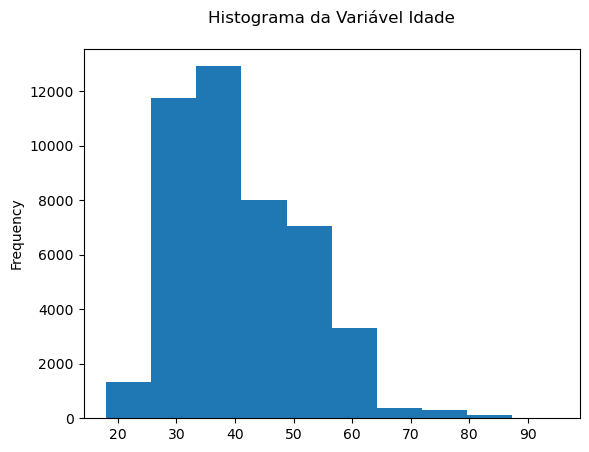

In [23]:
# Histograma
df.age.plot(kind = "hist")
plt.title("Histograma da Variável Idade\n")
plt.show()

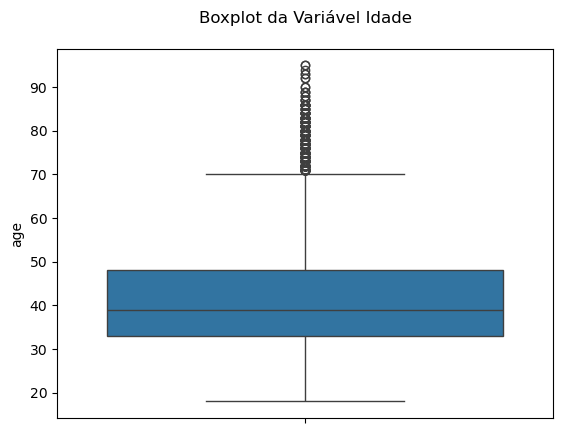

In [24]:
# Boxplot
sns.boxplot(df.age)
plt.title("Boxplot da Variável Idade\n")
plt.show()

In [25]:
# Vamos verificar qual é a média de idade.
df.age.mean()

np.float64(40.93565090394105)

In [26]:
# Vamos verificar qual é a mediana, valor do meio da distribuição quando os dados estão ordenados.
df.age.median()

39.0

In [27]:
# Vamos verificar qual é a moda, o valor que aparece com mais frequência.
df.age.mode()

0    32.0
Name: age, dtype: float64

> Exercício 2: Vamos imputar os valores ausentes da variável age com uma medida de tendência central. Escolha uma das medidas, aplique a imputação e justifique sua escolha. Deixamos a variável como float ou como int? Se convertemos, fazemos isso antes ou depois da imputação?

In [28]:
# Vamos preencher com a moda pois são poucos valores ausentes e assim alteramos muito pouco o padrão nos dados.
df.age.fillna("32", inplace = True)

In [29]:
# Agora convertemos para int
df.age = df.age.astype("int")

In [30]:
# Tipo da variável
df.age.dtypes

dtype('int64')

In [31]:
# Média
df.age.mean()

np.float64(40.93169803808808)

In [32]:
# Mediana
df.age.median()

39.0

In [33]:
# Percentual de valores ausentes
df.age.isnull().mean()*100

np.float64(0.0)

## Tratamento de Valores Ausentes

> Vamos agora tratar a variável que representa o mês.

In [34]:
# Valores ausentes no dataframe
df.isna().any()

age          False
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [35]:
# Valores ausentes na variável
df.month.isnull().sum()

np.int64(50)

In [36]:
# Percentual de valores ausentes
df.month.isnull().mean()*100

np.float64(0.11059255490920351)

Como o percentual é menor que 30% não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 50 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

In [37]:
# Tipo da variável
df.month.dtypes

dtype('O')

In [38]:
# Categorias da variável
df.month.value_counts()

month
may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: count, dtype: int64

> Exercício 3: Vamos imputar os valores ausentes da variável month. Escolha uma estratégia e aplique no dataset.

In [39]:
# Vamos imputar com a moda, o valor mais frequente da variável, pois são poucos registros
df.month.mode()

0    may, 2017
Name: month, dtype: object

In [40]:
# Imputação com a moda
df.month.fillna("may, 2017", inplace = True)

In [41]:
# Valores ausentes tratados com sucesso
df.month.isnull().sum()

np.int64(0)

## Tratamento de Valores Ausentes

> Vamos agora tratar a variável que representa o salário.

In [42]:
# Valores ausentes no dataframe
df.isna().any()

age          False
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [43]:
# Valores ausentes na variável
df.salary.isnull().sum()

np.int64(26)

In [44]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

np.float64(0.05750812855278583)

Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 26 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

Mas espere. Vamos checar algo aqui.

In [45]:
df.head()

age    salary  balance  marital targeted default housing loan  contact  \
0   58  100000.0     2143  married      yes      no     yes   no  unknown   
1   44   60000.0       29   single      yes      no     yes   no  unknown   
2   33  120000.0        2  married      yes      no     yes  yes  unknown   
3   47   20000.0     1506  married       no      no     yes   no  unknown   
4   33       0.0        1   single       no      no      no   no  unknown   

   day      month duration  campaign  pdays  previous poutcome response  \
0    5  may, 2017  261 sec         1     -1         0  unknown       no   
1    5  may, 2017  151 sec         1     -1         0  unknown       no   
2    5  may, 2017   76 sec         1     -1         0  unknown       no   
3    5  may, 2017   92 sec         1     -1         0  unknown       no   
4    5  may, 2017  198 sec         1     -1         0  unknown       no   

            job  education  
0    management   tertiary  
1    technician  secondary  
2  entrepreneur  secondary  
3   blue-collar    unknown  
4       unknown    unknown

Existe salário igual a zero? Não. O valor zero é provavelmente um outlier (confirmar com a área de negócio).

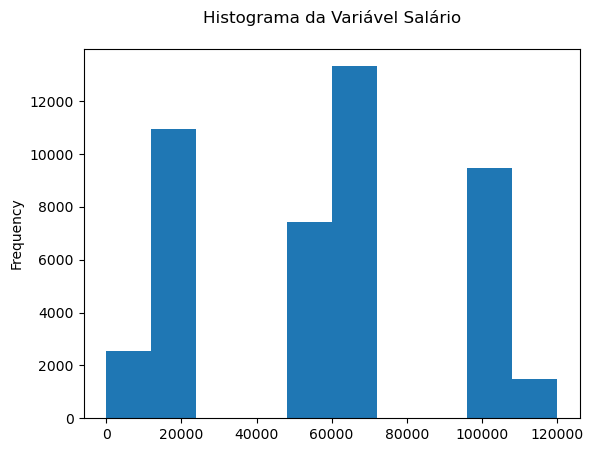

In [46]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

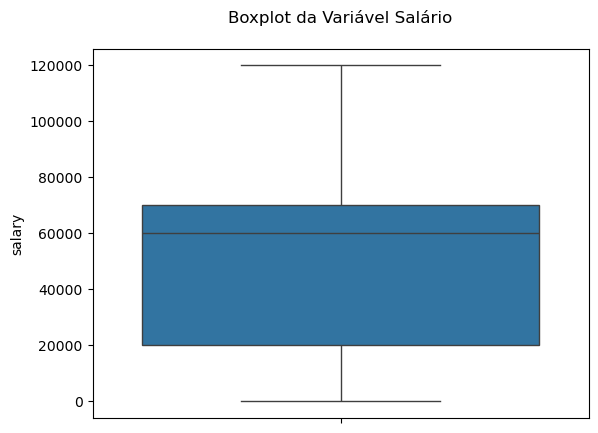

In [47]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [48]:
# Vamos verificar qual é a média de idade.
df.salary.mean()

np.float64(57008.65331415293)

In [49]:
# Vamos verificar qual é a mediana.
df.salary.median()

60000.0

In [50]:
# Vamos verificar qual é a moda.
df.salary.mode()

0    20000.0
Name: salary, dtype: float64

> Exercício 4: Vamos imputar os valores ausentes da variável salary com uma medida de tendência central. Precisamos também tratar os valores iguais a zero. Escolha sua estratégia, aplique a imputação e justifique sua escolha. 

In [51]:
# Vamos preencher com a mediana pois os dados parecem assimétricos (nesse caso a média não pode ser usada) 
# e o valor mais frequente está muito abaixo da média e da mediana (por isso não usaremos a moda)
df.salary.fillna("60000", inplace = True)

In [52]:
df.head()

age    salary  balance  marital targeted default housing loan  contact  \
0   58  100000.0     2143  married      yes      no     yes   no  unknown   
1   44   60000.0       29   single      yes      no     yes   no  unknown   
2   33  120000.0        2  married      yes      no     yes  yes  unknown   
3   47   20000.0     1506  married       no      no     yes   no  unknown   
4   33       0.0        1   single       no      no      no   no  unknown   

   day      month duration  campaign  pdays  previous poutcome response  \
0    5  may, 2017  261 sec         1     -1         0  unknown       no   
1    5  may, 2017  151 sec         1     -1         0  unknown       no   
2    5  may, 2017   76 sec         1     -1         0  unknown       no   
3    5  may, 2017   92 sec         1     -1         0  unknown       no   
4    5  may, 2017  198 sec         1     -1         0  unknown       no   

            job  education  
0    management   tertiary  
1    technician  secondary  
2  entrepreneur  secondary  
3   blue-collar    unknown  
4       unknown    unknown

In [53]:
# Histograma (vai gerar erro)
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

TypeError: no numeric data to plot

In [ ]:
# Tipo da variável
df.salary.dtypes

In [ ]:
# Convertemos para o tipo float
df.salary = df.salary.astype("float")

In [54]:
# Tipo da variável
df.salary.dtypes

dtype('O')

In [55]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

TypeError: no numeric data to plot

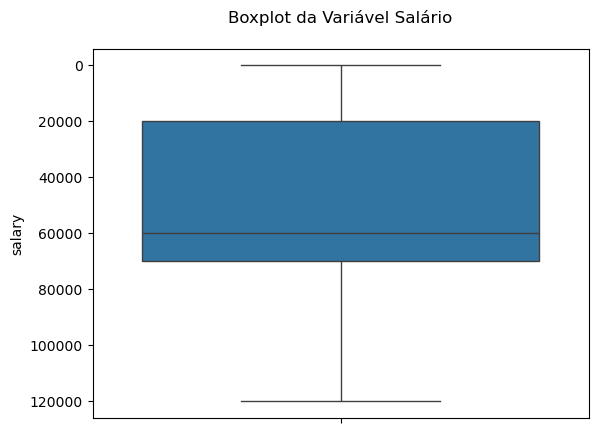

In [56]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [57]:
# Registros para cada salário
df.salary.value_counts()

salary
20000.0     9725
100000.0    9454
60000.0     9169
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
60000         26
Name: count, dtype: int64

In [58]:
# Replace do zero pela mediana
df['salary'] = df['salary'].replace(0, df['salary'].median())

TypeError: Cannot convert [100000.0 60000.0 120000.0 ... 55000.0 20000.0 120000.0] to numeric

In [ ]:
# Registros para cada salário
df.salary.value_counts()

In [ ]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

In [ ]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [59]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

np.float64(0.0)

In [60]:
df.isna().any()

age          False
salary       False
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

## Tratamento de Valores Ausentes

> Vamos agora tratar a variável que representa a resposta (variável alvo).

In [61]:
df.head()

age    salary  balance  marital targeted default housing loan  contact  \
0   58  100000.0     2143  married      yes      no     yes   no  unknown   
1   44   60000.0       29   single      yes      no     yes   no  unknown   
2   33  120000.0        2  married      yes      no     yes  yes  unknown   
3   47   20000.0     1506  married       no      no     yes   no  unknown   
4   33       0.0        1   single       no      no      no   no  unknown   

   day      month duration  campaign  pdays  previous poutcome response  \
0    5  may, 2017  261 sec         1     -1         0  unknown       no   
1    5  may, 2017  151 sec         1     -1         0  unknown       no   
2    5  may, 2017   76 sec         1     -1         0  unknown       no   
3    5  may, 2017   92 sec         1     -1         0  unknown       no   
4    5  may, 2017  198 sec         1     -1         0  unknown       no   

            job  education  
0    management   tertiary  
1    technician  secondary  
2  entrepreneur  secondary  
3   blue-collar    unknown  
4       unknown    unknown

In [62]:
# Valores ausentes
df.response.isnull().sum()

np.int64(30)

In [63]:
# Calcula o percentual
df.response.isnull().mean()*100

np.float64(0.0663555329455221)

Como o percentual é baixo (e a variável é o alvo da nossa análise) não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 30 linhas no dataset) ou podemos aplicar imputação.

> Exercício 5: Escolha sua estratégia, aplique e justifique sua escolha. 

In [64]:
# Não devemos aplicar imputação na variável de estudo (variável resposta ou variável alvo)
# Vamos dropar os registros
df.dropna(subset = ["response"], inplace = True)

In [65]:
# Verifca valores NA
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Tratamento de Valores Ausentes

> Vamos agora tratar a variável pdays.

In [66]:
# Valores ausentes
df.pdays.isnull().sum()

np.int64(0)

In [67]:
# Describe
df.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indica valor ausente

In [68]:
# Vamos fazer relace de -1 por NaN
df.pdays = df.pdays.replace({-1.0:np.NaN})

AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.

In [69]:
df.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'job', 'education'],
      dtype='object')

In [70]:
import numpy as np

# Substituir -1 por NaN na coluna 'response'
df['response'] = df['response'].replace({-1.0: np.nan})


In [71]:
df['response'].isna().sum()

np.int64(0)

In [72]:
# Ver todos os valores nulos
df.isna().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [73]:
# Valores ausentes
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [74]:
# Calcula o percentual
df.pdays.isnull().mean()*100

np.float64(0.0)

> Exercício 6: Escolha sua estratégia, aplique e justifique sua escolha. 

In [75]:
# Drop da coluna "pdays" pois tem mais de 30% dos valores ausentes
df.drop(["pdays"], axis = 1, inplace = True)

In [76]:
# Valores ausentes
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Conclusão e Análise dos Dados

### Análise Univariada

In [77]:
# Olhar para o comportamento de uma variável

In [78]:
# Proporção da variável de estado civil
df.marital.value_counts(normalize = True)

marital
married     0.601912
single      0.282907
divorced    0.115181
Name: proportion, dtype: float64

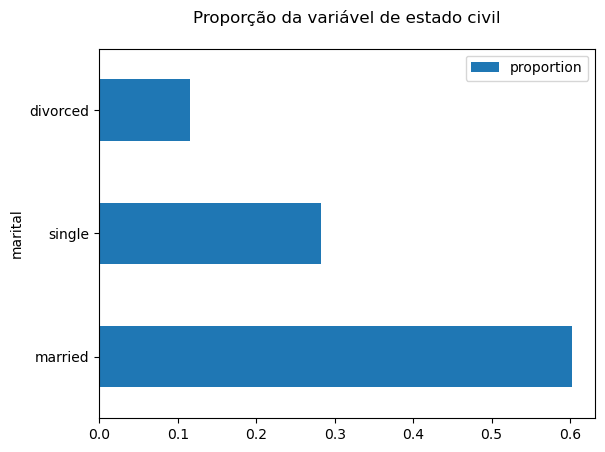

In [79]:
# Plot
df.marital.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de estado civil\n")
plt.legend()
plt.show()

In [80]:
# Proporção da variável de job
df.job.value_counts(normalize = True)

job
blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: proportion, dtype: float64

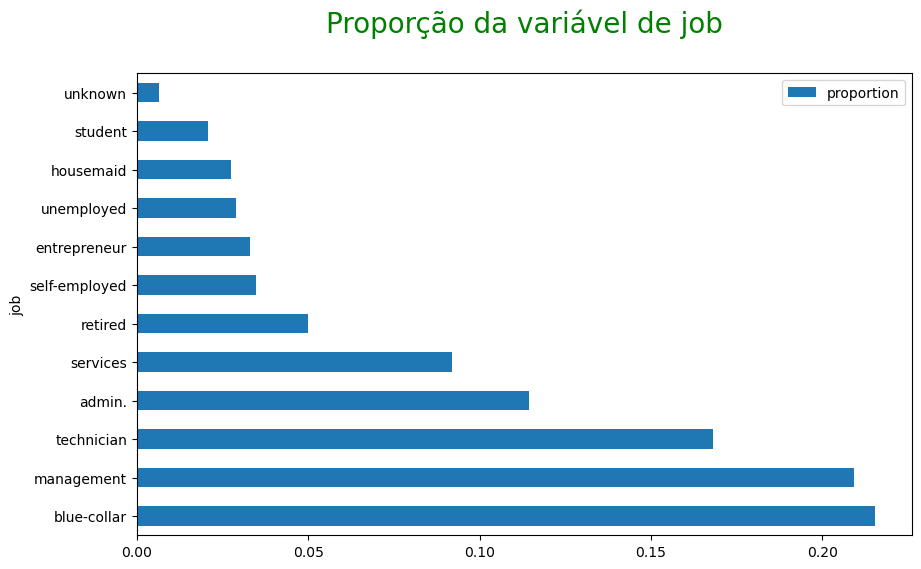

In [81]:
# Plot Gráfico de bARRAS = barh
plt.figure(figsize = (10,6))
df.job.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de job\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.show()

In [82]:
# Proporção da variável de education
df.education.value_counts(normalize = True)

education
secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: proportion, dtype: float64

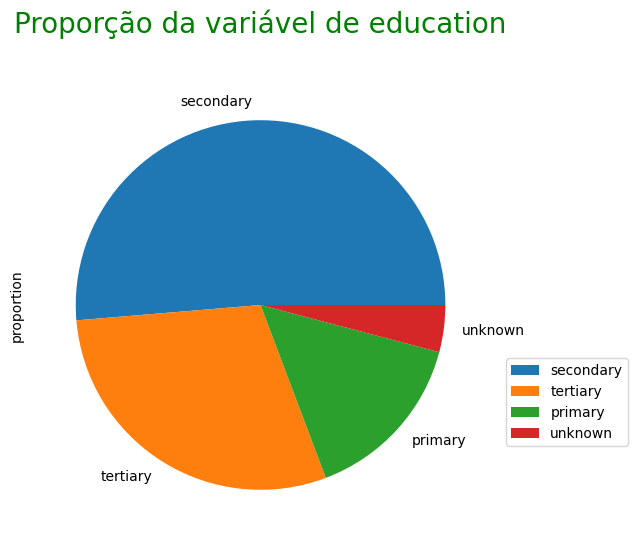

In [83]:
# Plot Gráfico de pizza = pie
plt.figure(figsize = (10,6))
df.education.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da variável de education\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

In [84]:
# Proporção da variável response
df.response.value_counts(normalize = True)

response
no     0.882982
yes    0.117018
Name: proportion, dtype: float64

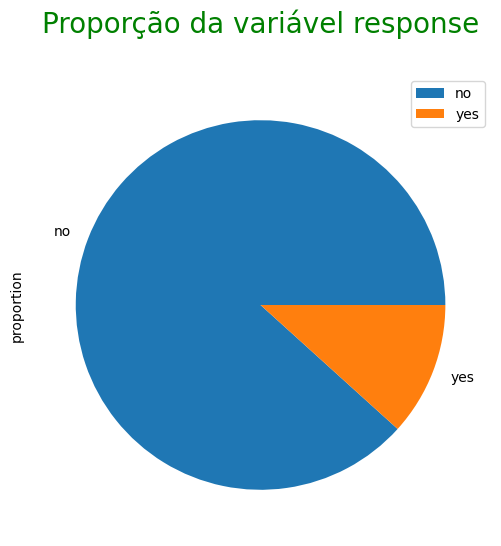

In [85]:
# Plot
plt.figure(figsize = (10,6))
df.response.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da variável response\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.show()

## Análise Multivariada

In [86]:
#Compreender o comportamento de diversas variáveis, de duas ou mais variáveis

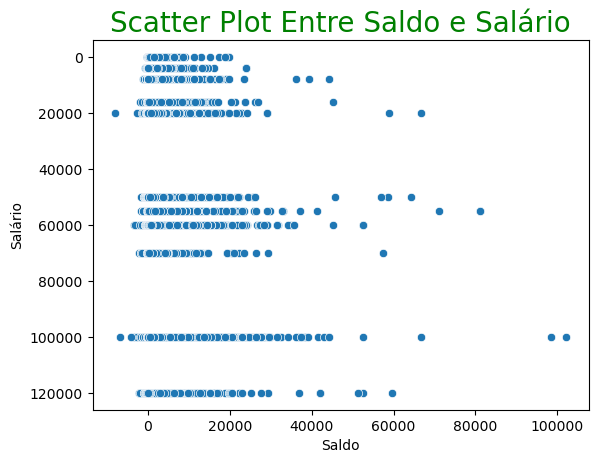

In [87]:
# Scatter Plot
#sns.scatterplot(df["balance"], df["salary"])
#plt.title("Scatter Plot Entre Saldo e Salário\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
#plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot
sns.scatterplot(x=df["balance"], y=df["salary"])

plt.title("Scatter Plot Entre Saldo e Salário", 
          fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})

plt.xlabel("Saldo")
plt.ylabel("Salário")
plt.show()


<Axes: xlabel='balance', ylabel='salary'>

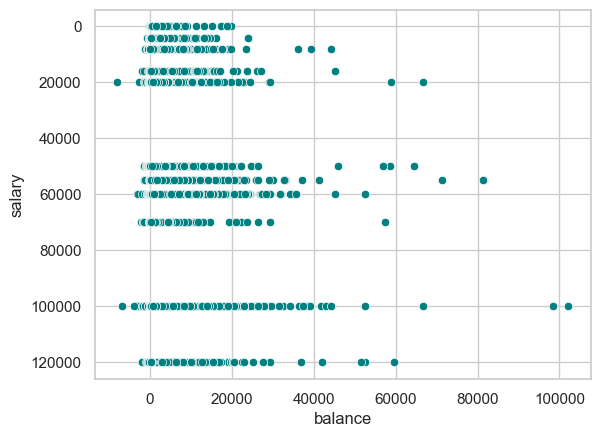

In [88]:
sns.set(style="whitegrid")
sns.scatterplot(x="balance", y="salary", data=df, color="teal")


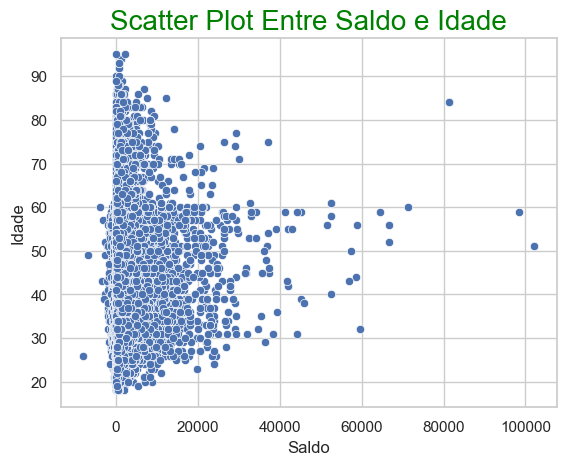

In [89]:
# Scatter Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot
sns.scatterplot(x=df["balance"], y=df["age"])

plt.title("Scatter Plot Entre Saldo e Idade", 
          fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})

plt.xlabel("Saldo")
plt.ylabel("Idade")
plt.show()


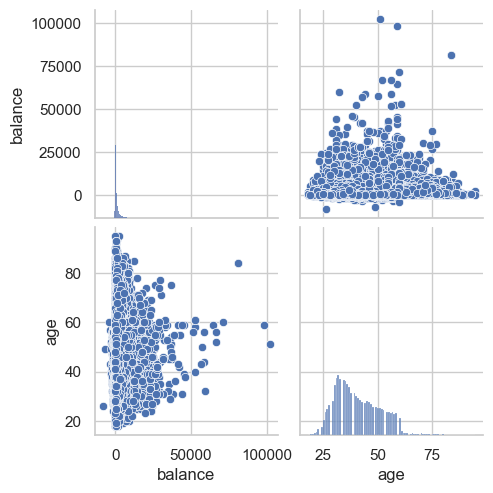

In [90]:
# Pair Plot
sns.pairplot(df[["salary","balance","age"]])
plt.show()

In [91]:
# Calcula a correlação
res = df[["salary", "balance", "age"]].corr()

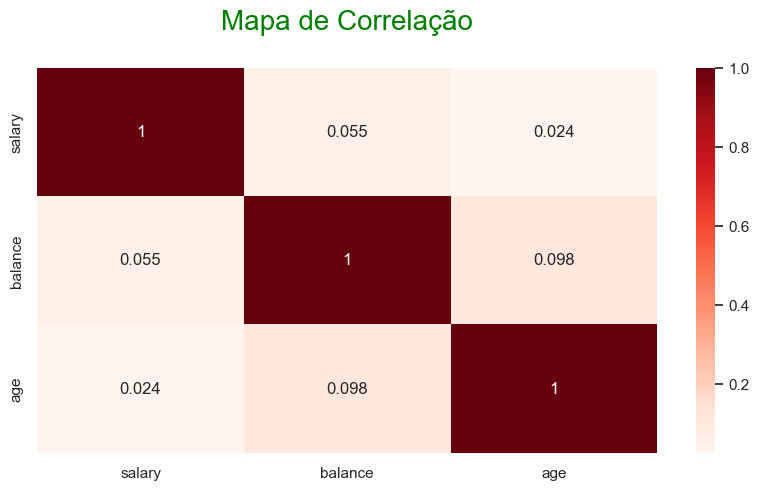

In [92]:
# Mapa de Correlação    Correlação não implica causalidade
plt.figure(figsize = (10,5))
sns.heatmap(res, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

### Numérico x Categórico

In [93]:
# Agrupa o salário pela variável resposta e calcula a média
df.groupby(by = ["response"])["salary"].mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
df['salary'].dtype

In [ ]:
#o dtype('O') confirma exatamente que:
#a coluna salary é do tipo object, ou seja, contém texto (strings), não números.
#Por isso o cálculo de média deu erro.
#corrigindo

#Converter para numérico

df["salary"] = pd.to_numeric(df["salary"], errors="coerce")

In [94]:
df['salary'].dtype

dtype('O')

In [95]:
#Conversão para Float
df.groupby("response")["salary"].mean()

TypeError: agg function failed [how->mean,dtype->object]

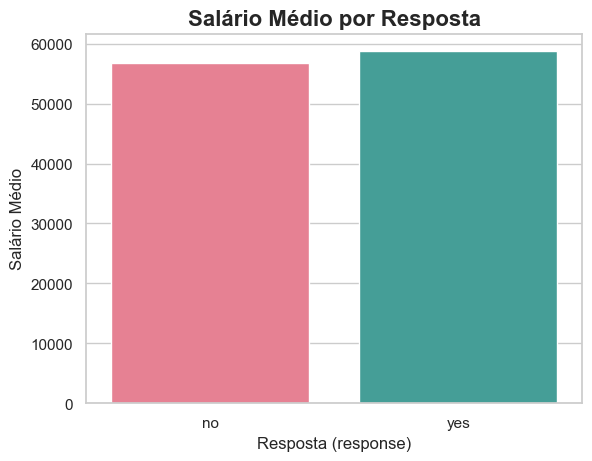

In [96]:
# Montando um gráfico de barras que mostra o salário médio de quem respondeu "yes" e "no" na coluna response.
import seaborn as sns
import matplotlib.pyplot as plt

# Garante que a coluna salary é numérica
df["salary"] = pd.to_numeric(df["salary"], errors="coerce")

# Agrupa e calcula a média
media_salario = df.groupby("response")["salary"].mean().reset_index()

# Gráfico
sns.barplot(x="response", y="salary", data=media_salario, palette="husl")

# Título e rótulos
plt.title("Salário Médio por Resposta", fontsize=16, fontweight='bold')
plt.xlabel("Resposta (response)")
plt.ylabel("Salário Médio")
plt.show()


In [97]:
df.groupby("response")["salary"].mean()

response
no     56775.680553
yes    58771.704180
Name: salary, dtype: float64

In [98]:
# Agrupa o salário pela variável resposta e calcula a mediana
df.groupby(by = ["response"])["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

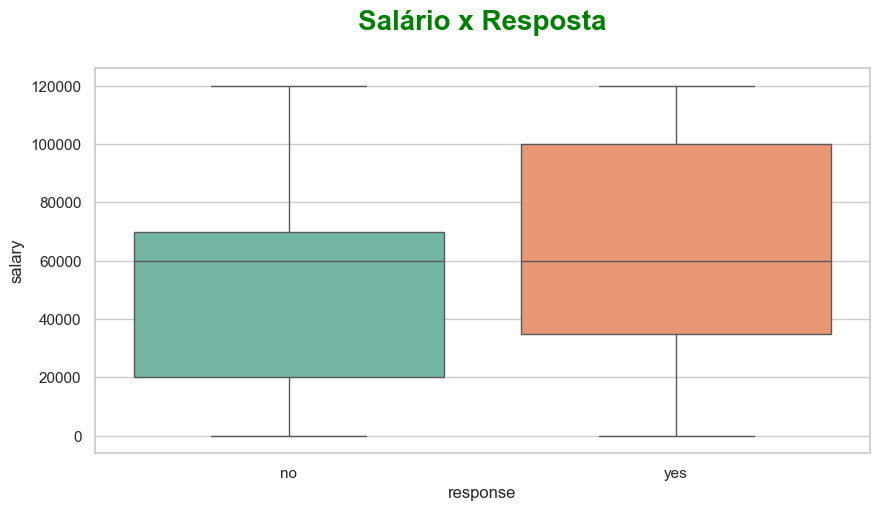

In [99]:
# Boxplot
#plt.figure(figsize = (10,5))
#sns.boxplot(df["response"], df["salary"])
#plt.title("Salário x Resposta\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
#plt.show()

# Cores por categoria (com palette)
plt.figure(figsize=(10,5))
sns.boxplot(x="response", y="salary", data=df, palette="Set2")
plt.title("Salário x Resposta\n", fontdict={'fontsize':20, 'fontweight':'bold', 'color':'green'})
plt.show()


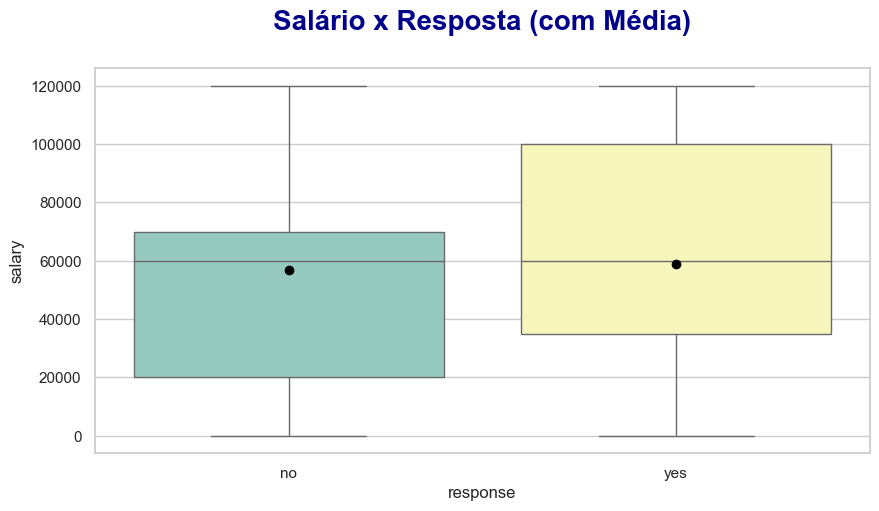

In [100]:
#Mostrar a média no gráfico
plt.figure(figsize=(10,5))
sns.boxplot(x="response", y="salary", data=df, palette="Set3", showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"})
plt.title("Salário x Resposta (com Média)\n", fontdict={'fontsize':20, 'fontweight':'bold', 'color':'darkblue'})
plt.show()


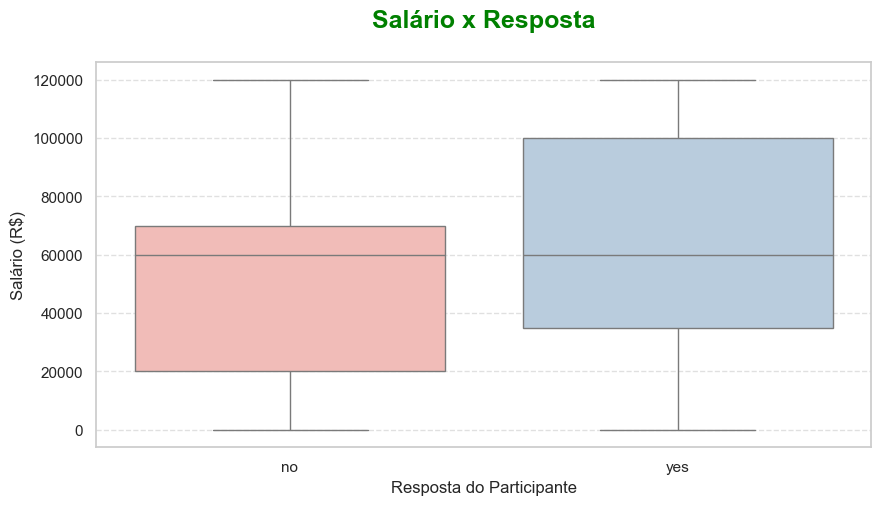

In [101]:
#Adicionar rótulos e eixo limpo
plt.figure(figsize=(10,5))
sns.boxplot(x="response", y="salary", data=df, palette="Pastel1")
plt.title("Salário x Resposta\n", fontsize=18, fontweight='bold', color='green')
plt.xlabel("Resposta do Participante", fontsize=12)
plt.ylabel("Salário (R$)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


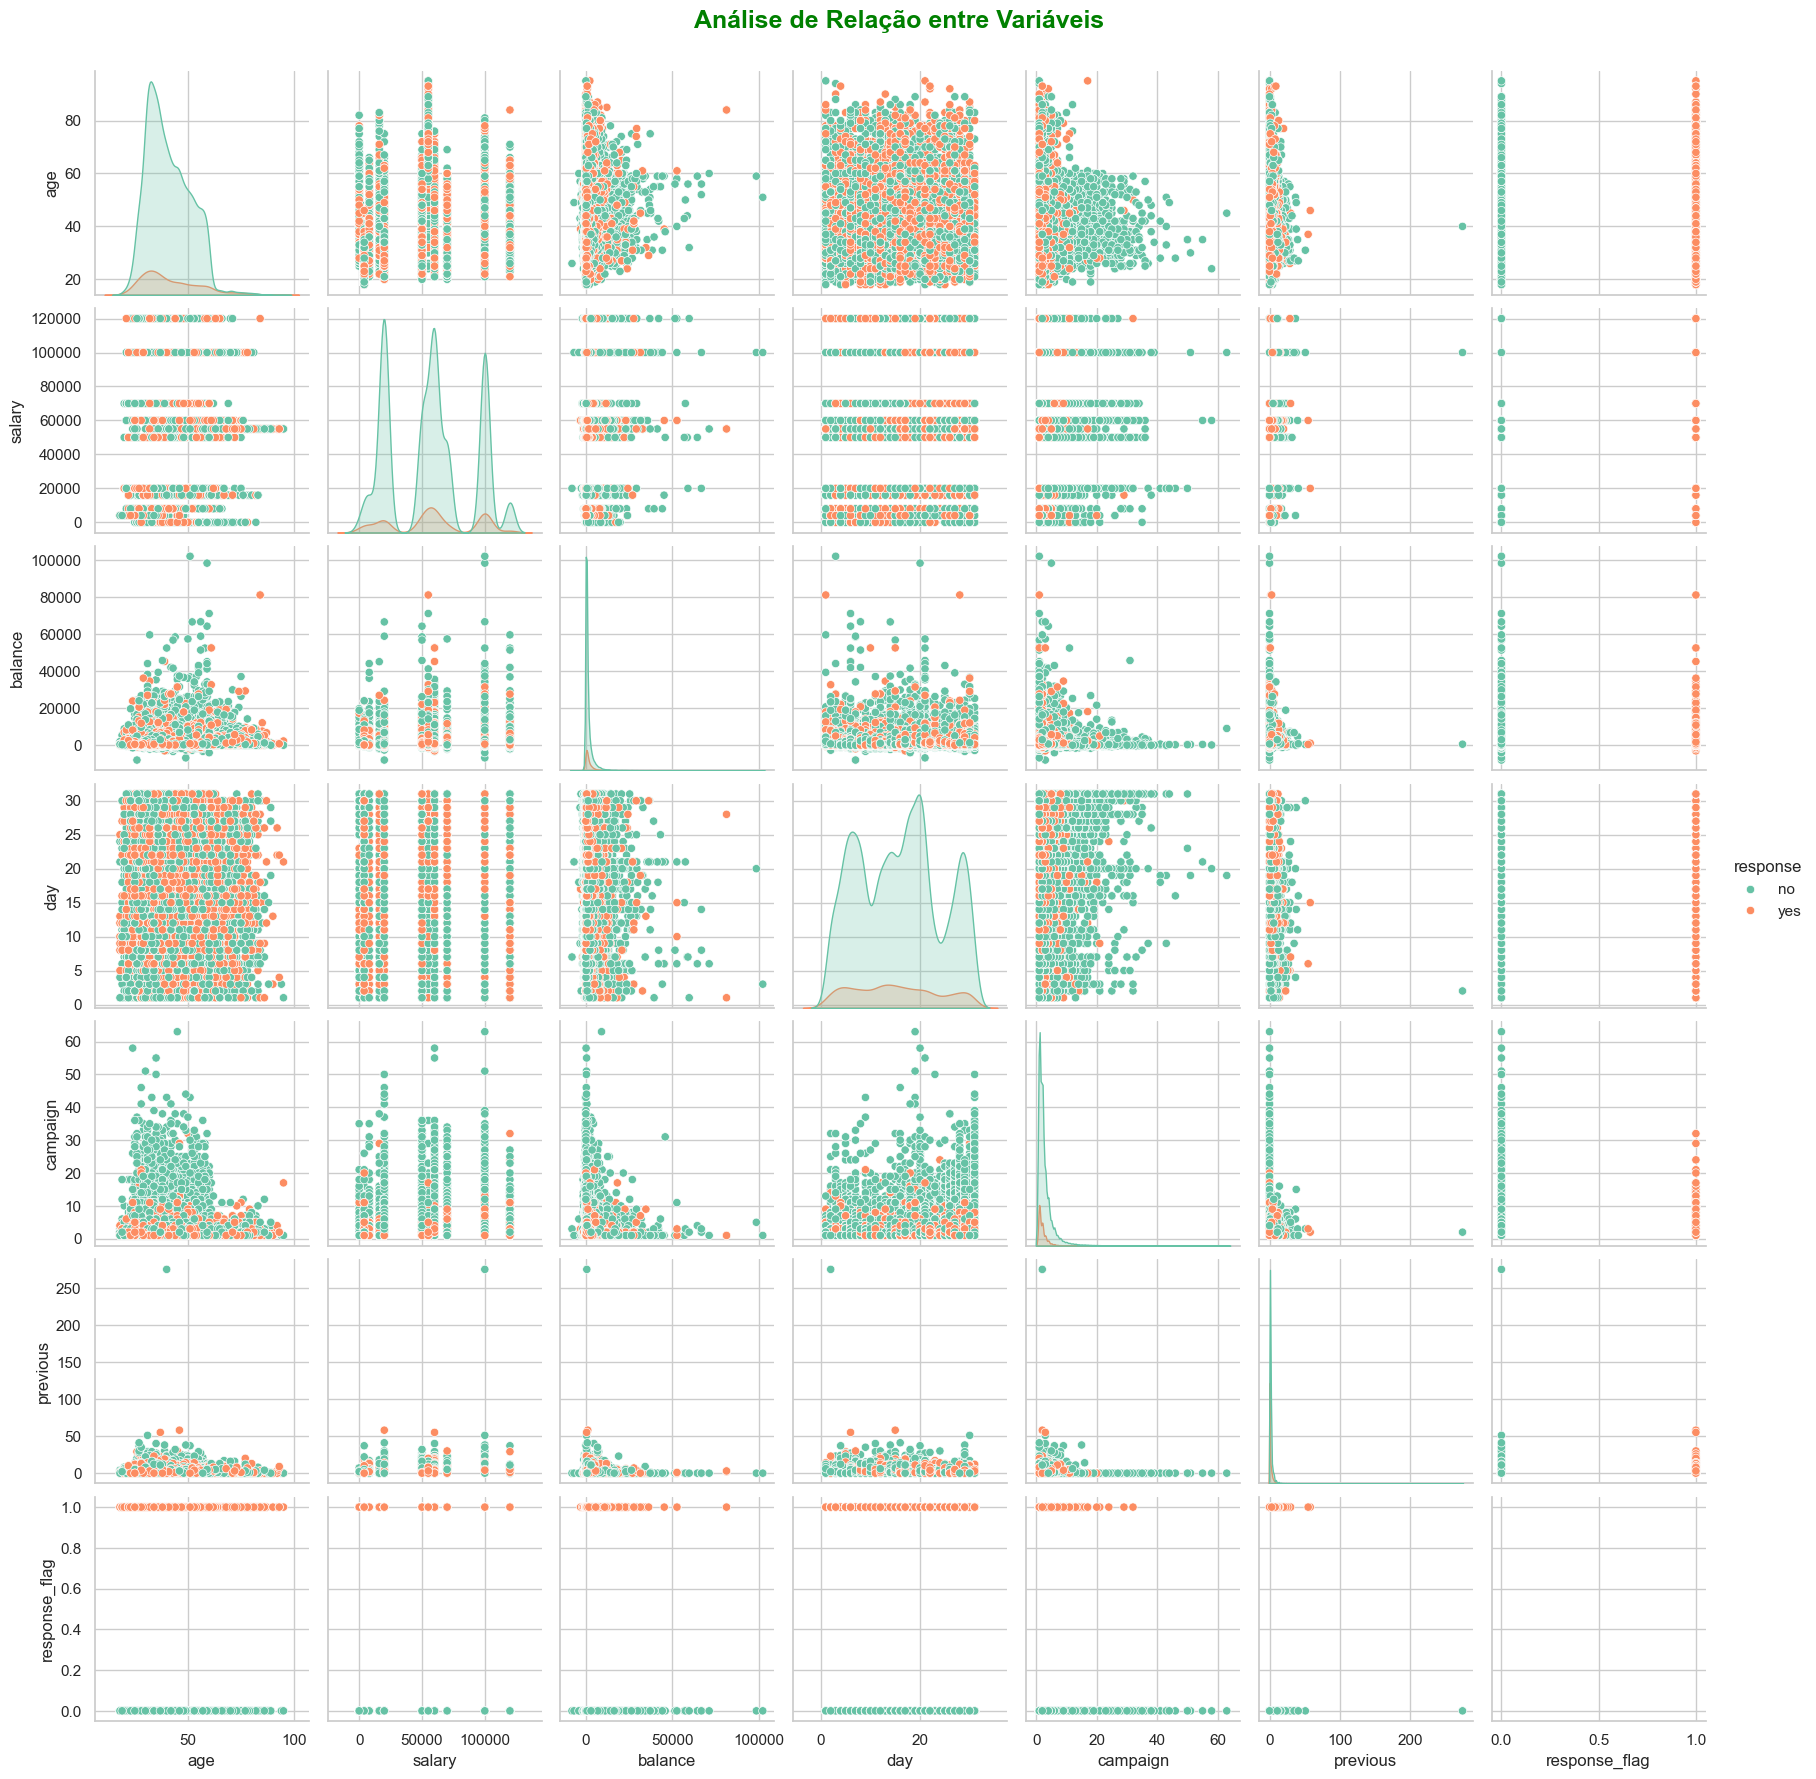

In [114]:
#Pair Plot colorido com Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Tamanho e estilo
sns.set(style="whitegrid", palette="Set2")

# Pairplot colorido por categoria de 'response'
sns.pairplot(df, hue="response", diag_kind="kde", height=2.5)

plt.suptitle("Análise de Relação entre Variáveis\n", fontsize=18, fontweight='bold', color='green', y=1.02)
plt.show()

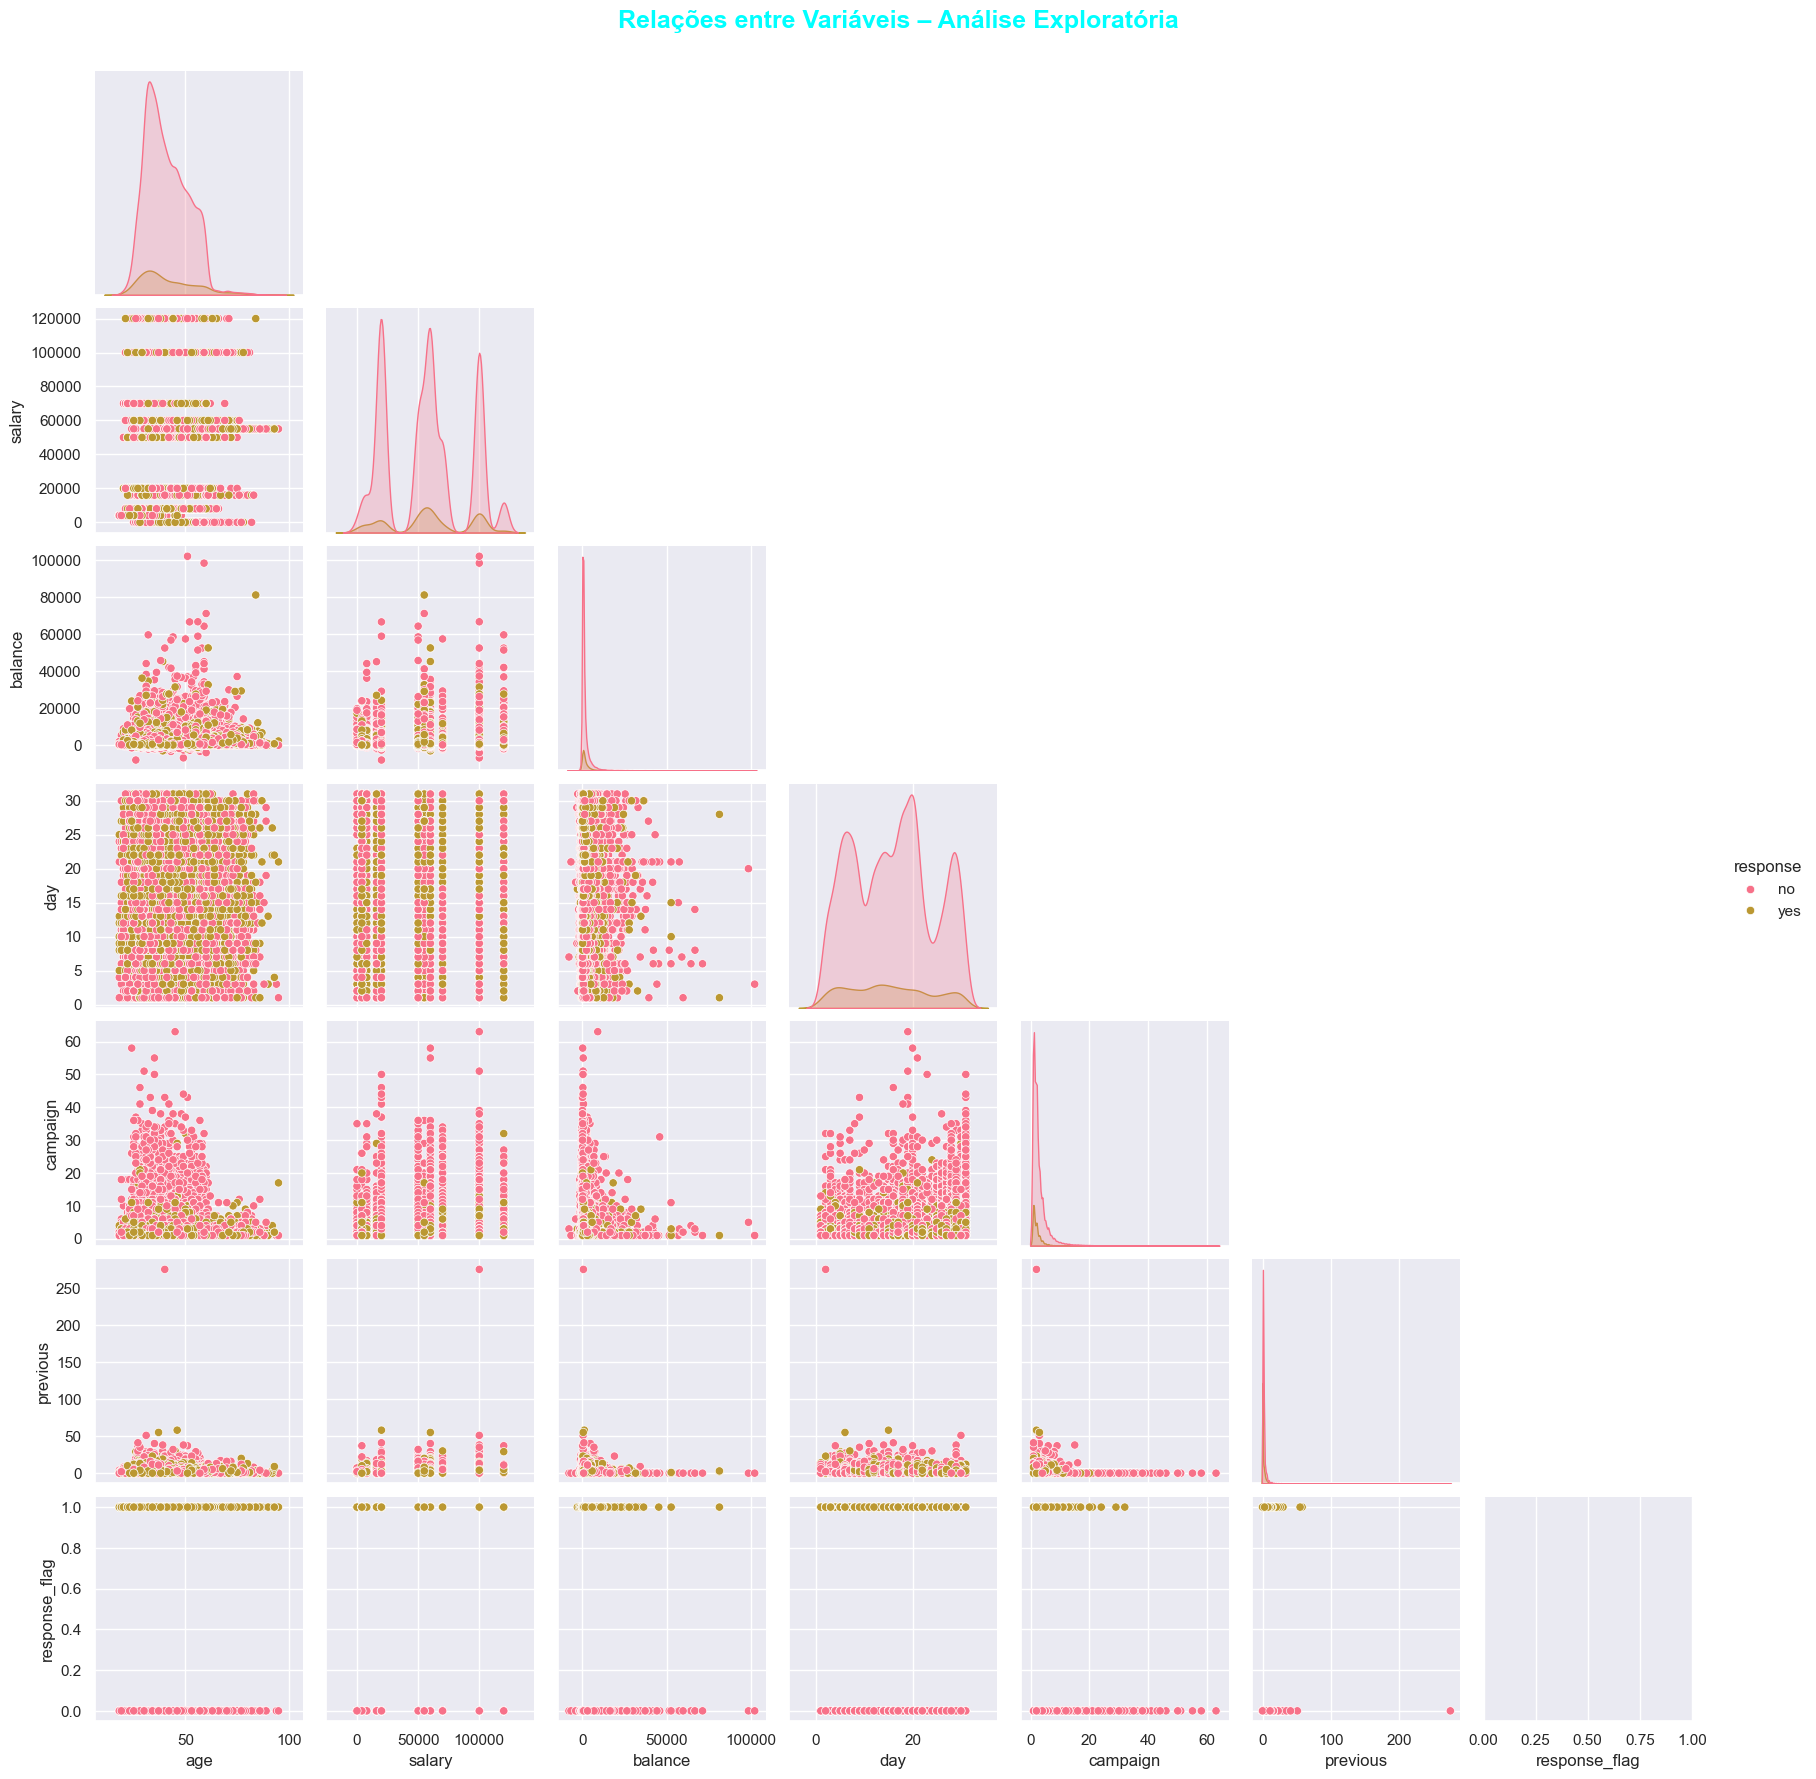

In [112]:
#Versão alternativa com tema escuro (dashboard style)
sns.set_theme(style="darkgrid", palette="husl")

sns.pairplot(df, hue="response", diag_kind="kde", corner=True)
plt.suptitle("Relações entre Variáveis – Análise Exploratória\n", fontsize=18, fontweight='bold', color='cyan', y=1.02)
plt.show()


In [103]:
# Agrupa educação por salário e calcula a média
df.groupby(by = ["education"])["salary"].mean()

education
primary      34250.000000
secondary    49738.712320
tertiary     82865.031598
unknown      46602.909483
Name: salary, dtype: float64

In [104]:
# Cria a variável response_flag como tipo numérico onde response "yes"= 1, "no"= 0
df["response_flag"] = np.where(df["response"] == "yes",1,0)
df.head()

age    salary  balance  marital targeted default housing loan  contact  \
0   58  100000.0     2143  married      yes      no     yes   no  unknown   
1   44   60000.0       29   single      yes      no     yes   no  unknown   
2   33  120000.0        2  married      yes      no     yes  yes  unknown   
3   47   20000.0     1506  married       no      no     yes   no  unknown   
4   33       0.0        1   single       no      no      no   no  unknown   

   day      month duration  campaign  previous poutcome response  \
0    5  may, 2017  261 sec         1         0  unknown       no   
1    5  may, 2017  151 sec         1         0  unknown       no   
2    5  may, 2017   76 sec         1         0  unknown       no   
3    5  may, 2017   92 sec         1         0  unknown       no   
4    5  may, 2017  198 sec         1         0  unknown       no   

            job  education  response_flag  
0    management   tertiary              0  
1    technician  secondary              0  
2  entrepreneur  secondary              0  
3   blue-collar    unknown              0  
4       unknown    unknown              0

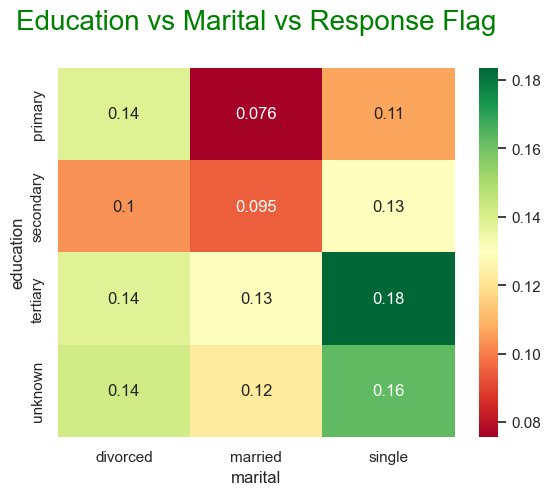

In [108]:
# Mapa de correlação
res1 = df.pivot_table(index = "education", columns = "marital", values = "response_flag", aggfunc = "mean")
sns.heatmap(res1, annot = True, cmap = "RdYlGn")
plt.title("Education vs Marital vs Response Flag\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

# Fim

# Relatório Final

In [118]:
# Análise de Valores Ausentes e Imputação

# Durante a exploração dos dados, identificamos a presença de valores ausentes em algumas colunas do conjunto de dados. Valores ausentes representam a **falta de informação**, e seu tratamento é essencial para não comprometer análises futuras.

# Para resolver isso, aplicamos a técnica de **imputação**, substituindo os valores ausentes pela **moda** de cada coluna.  
# A **moda** é uma medida de tendência central que representa o valor mais frequente em uma determinada coluna, sendo uma escolha adequada quando queremos manter a distribuição original dos dados sem criar valores artificiais.

# > **Resumo do procedimento realizado:**
# > - Identificação de valores ausentes por coluna.
# > - Aplicação da imputação pela moda.
# > - Verificação final para garantir que não existam mais valores ausentes.

# Esta etapa garante que o conjunto de dados esteja pronto para análises e visualizações confiáveis, evitando vieses decorrentes da falta de informação.


#======================================================================================================================================================================================================================================================================

#Durante a análise exploratória dos dados, foram identificados valores ausentes (missing values) em algumas colunas. Esses valores representam a ausência de informação em determinados registros, o que pode afetar a qualidade das análises e dos modelos preditivos.
#Para resolver o problema, foi aplicada a técnica de imputação, substituindo os valores ausentes pela moda (valor mais frequente da coluna).
#Essa escolha foi feita por se tratar de uma medida de tendência central adequada para variáveis categóricas e para colunas com baixa variabilidade, mantendo a coerência dos dados e evitando distorções estatísticas.
#Após a imputação, os dados ficaram completos e prontos para as próximas etapas da análise.

In [120]:
#Importar bibliotecas e preparar dados
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Exemplo: carregando seu dataset
# df = pd.read_csv("seu_arquivo.csv")

# Garantindo que não haja valores ausentes
df = df.fillna(df.mode().iloc[0])


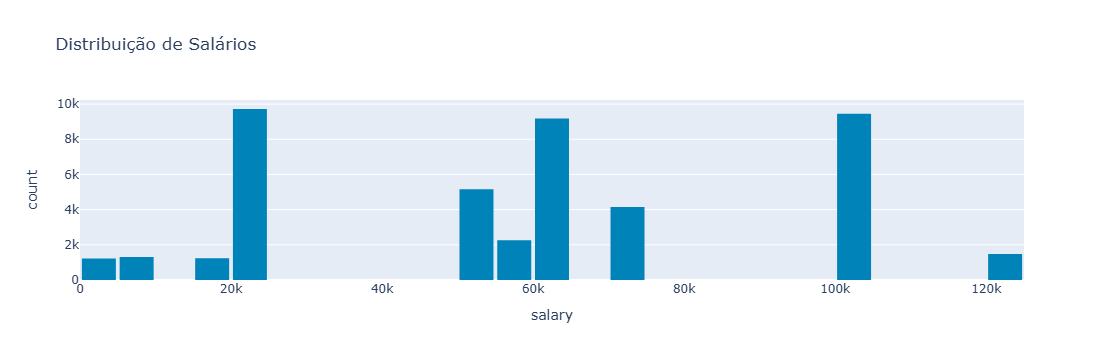

In [122]:
#Distribuição de salários
fig1 = px.histogram(df, x="salary", nbins=30, title="Distribuição de Salários",
                    color_discrete_sequence=["#0083B8"])
fig1.update_layout(bargap=0.1)
fig1.show()


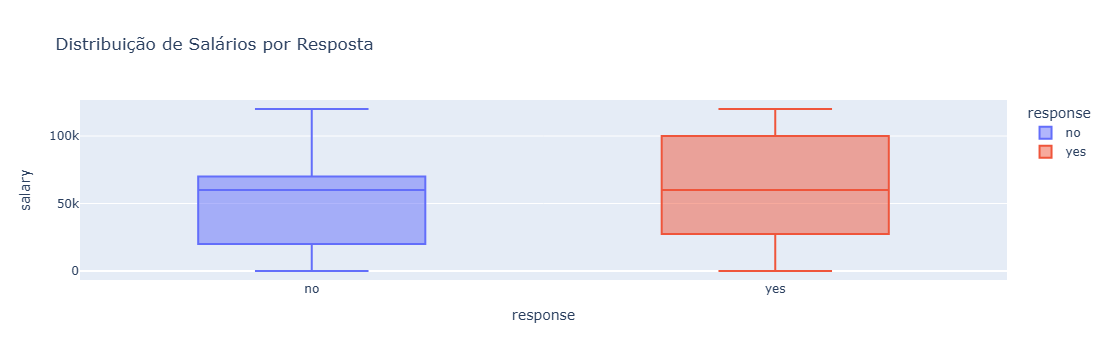

In [123]:
# Boxplot de salário por resposta
fig2 = px.box(df, x="response", y="salary", color="response",
              title="Distribuição de Salários por Resposta")
fig2.show()


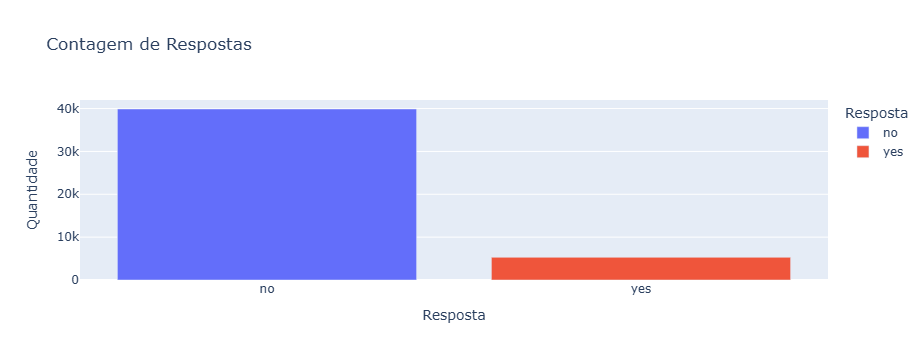

In [129]:
# Contagem de respostas
df_counts = df["response"].value_counts().reset_index()
df_counts.columns = ["Resposta", "Quantidade"]

# Gráfico
fig3 = px.bar(df_counts,
              x="Resposta",
              y="Quantidade",
              title="Contagem de Respostas",
              color="Resposta")
fig3.show()


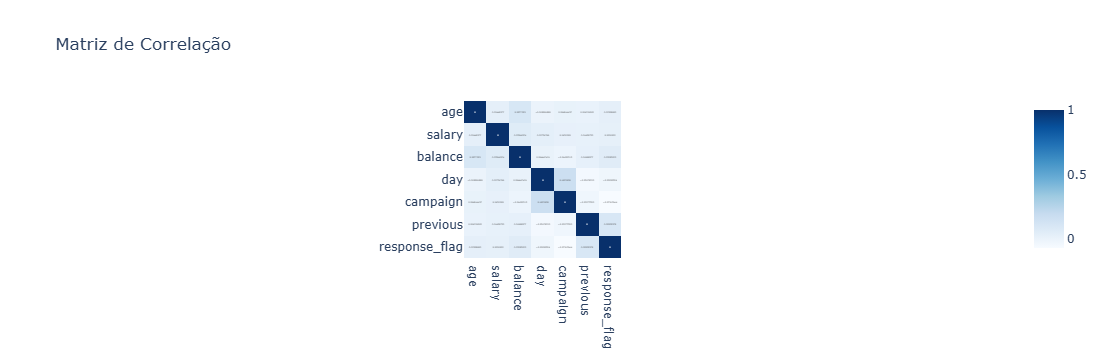

In [125]:
#Correlação entre variáveis numéricas
corr = df.corr(numeric_only=True)
fig4 = px.imshow(corr, text_auto=True, color_continuous_scale="Blues",
                 title="Matriz de Correlação")
fig4.show()



# FINAL DO RELATÓRIO

In [ ]:
# Durante a análise exploratória dos dados, foram identificados valores ausentes (missing values) em algumas colunas. Esses valores representam a ausência de informação em determinados registros, o que pode afetar a qualidade das análises e dos modelos preditivos.
# Para resolver o problema, foi aplicada a técnica de imputação, substituindo os valores ausentes pela moda (valor mais frequente da coluna).
# Essa escolha foi feita por se tratar de uma medida de tendência central adequada para variáveis categóricas e para colunas com baixa variabilidade, mantendo a coerência dos dados e evitando distorções estatísticas.
# Após a imputação, os dados ficaram completos e prontos para as próximas etapas da análise.